# Numerical Solutions to Differential Equations

As we learned previously, physics can be approximated as the science of figuring out (and then solving) differential equations that describe some physical system -- the system's **differential equations of motion**. An example we worked with was the harmonic oscillator, whose equation of motion is:

$$ m \ddot x = -k x $$

and the solution of this equation is:

$$ x(t) = A \cdot \cos\left(\sqrt{\frac{k}{m}} t + \phi\right) $$

where

$$ \phi = \arctan \left( - \frac{v_0}{x_0} \sqrt{\frac{m}{k}} \right) $$

$$ A    = \sqrt{x_0^2 + v_0^2 \frac{m}{k}}  $$

.

This is great! Given the initial position and velocity, we can simply plug them into the equation above an find out where the body will be at any other time $t$.

But as we mentioned previously, not all D.E.s have such nice solutions (or even any solutions that can be written using elementary functions at all). We've already encountered an example of this when looking at integration. Let's take the integral that we could only evaluate numerically, and now think of it as solving a differential equation:

$$ f'(x) = \sqrt{1-x^4} $$

We'll now solve it again (come up with a numerical solution), but thinking of it as solving a differential equation.

(note: when we solved this while learning integration, we denoted the integral as $I$ and the function being integrated as $f(x) = \sqrt{1-x^4}$; here we denote the integral as $f(x)$, and the its derivative is $f'(x) = \sqrt{1-x^4}$. This is just nomenclature, nothing very profound (but can still be confusing).).

(important side note: differential equations that depend on only a single intependent variable -- e.g., on time -- are called [Ordinary Differential Equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation). You'll see me frequently use the abbreviation ODE to refer to them)

## Finite difference approximation

Let's first rewrite this equation using the df/dt nomenclature:

$$ f'(x) = \frac{df}{dx}(x) = \sqrt{1-x^4} $$

The meaning of these *differentials* on the left are:
* $df$ -- the change in the value of the function across an [infinitesimally](https://www.merriam-webster.com/dictionary/infinitesimal) small interval $dx$
* $dx$ -- that infinitesimally small interval

Let's replace these infinitesimal intervals with finite (but still small) intervals:

$$ f'(x) = \frac{df}{dx}(x) \approx \frac{\Delta f}{\Delta x}(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

Now we rearrange the result a bit and get:

$$ f(x+\Delta x) \approx f(x) + f'(x) \cdot \Delta x $$

and we finish by replacing $f'(x)$ with $\sqrt{1-x^4}$, the right-hand side of our differential equation:

$$ f(x+\Delta x) \approx f(x) + \sqrt{1-x^4} \cdot \Delta x $$


So what do we have here? We have a rule that, if we know the value of $f$ at some $x$, gives us a way to (approximately) compute the value of $f$ at a point $\Delta x$ away -- the $f(x + \Delta x)$. Once we compute that, we can do it again: if I know the value at $f(x + \Delta x)$, I can use the equation to compute the value at $f(x + 2 \Delta x)$. Etc, etc, until we reach the value of $x$ that we're trying to get to.

We've created **an algorithm** to compute the (approximate) result.

Let's make this clearer by implementing this algorithm:

f(1.0) = 0.9109933837


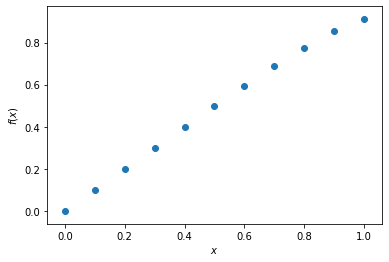

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dfdx(x):
    return np.sqrt(1 - x**4)

dx = 0.1       # the step size
xbegin = 0.    # the starting point of the integration
xend = 1.      # the ending point
fbegin = 0.    # the value of f at the start (see note #1)

# the implementation of the algorithm that repeatedly evaluates the 
# finite difference approximation to find the values of f() at subsequent
# points x. It keeps repeating until it x reaches xend.
# As it does it, it saves the values of x and f(x) it computed along
# the way, so that we can plot them in the end.
x = xbegin
f = fbegin
fvalues = []
xvalues = []
while x < xend:
    xvalues.append(x)
    fvalues.append(f)

    fnew = f + dfdx(x) * dx
    f = fnew
    x = x + dx
fend = f

# Plotting
plt.scatter(xvalues, fvalues)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
print(f"f({xend}) = {fend:.10f}")

The above code starts with an initial value of $f$ at $x=0$, and then computes the subsequent values in steps of $dx$ until it reaches $x=x_{end}=1$.

Let's develop some intuition for what's going on here. We can think of it as follows: at the beginning, we have some starting value of the function (we've chosen zero -- more on that later). We don't know what the function is in the next step, but we know what its _rate of change_ is -- that's what the D.E. gives us (that's $f'(x)$). So -- we reason -- one step later the function's value should be the current value _plus_ the rate of change times the time over which that change has been ongoing. E.g., if I'm growing at an inch per year, and on January 1st I'm 5ft tall, by February I'll be approximately 5ft 1/12" tall. And that's exactly what $f(x+\Delta x) \approx f(x) + f'(x) \cdot \Delta x$ means.

This is easier to intuitively grasp if you replace $f(x)$ with $x(t)$ -- the position of a body. If I know the position of a body at some instant of time, and I know its velocity at that point, the (approximate) position some small instant of time $\Delta t$ later will be equal to $x + v \cdot \Delta t$.

What about the choice of $f(x=0) = 0$? It's arbitrary, unless we have some extra information. Why? Imagine you've found some $f(x)$ that satisfies $ f'(x) = \sqrt{1-x^4} $. But then it's easy to show that any other $g(x) = f(x) + constant$ is also a solution (as the derivative of any constant is zero). So whether we've picked 0, or 42, or 90210 as the value of $f(x=0)$, it's still a perfectly valid solution.

We need something beyond the differential equation itself to eliminate this ambiguity. If we interpret this solution as finding the area under a curve (like we did when we considered this as a Reimann integration problem), then $f(x=0)=0$ is the right choice: we have to start at zero as we "sweep" and accumulate the area under the curve. You can verify this is the correct choice by comparing the result (0.91099...) we got above vs. what we've gotten in Lecture 1.

Another way to think about this is in terms of **initial conditions**. If we again $f(x)$ is actually the position $x(t)$, then it's easy to see that $x(t=0)$ is just the position of the body at time $t=0$.

In general, such ambiguity will always exist for solution of all differential equations -- the equation itself is insufficient, you need the initial conditions to fully determine a unique solution. Also, how many initial conditions are needed will depend on the *order* of the ODE; $n$-th order ODE requires $n$ intitial conditions. We've seen an example of this with the harmonic oscillator -- this is a 2nd order ODE (because the 2nd derivative shows up), and we needed not just $x_0$ but also $v_0$ to completely solve it. Intuitively this is early to understand -- to know where a car will end up, it's not just sufficient to know where it was at $t=0$, but also how fast it was going at that time.

The algorithm we've developed above is known as the [Euler's Method](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations#Euler_method). It is a first of many ODE solving methods.

## Accuracy and Step Size

How does the accuracy of our result depend on the step size, $dx$? Let's rewrite the code a bit to make it easier to explore this.

f_true = 0.8740191848
For dx=0.0001: f(1.000000) = 0.8740687690 (difference: 0.000050) (time: 47.196101 milliseconds)
For dx=0.0010: f(1.000000) = 0.8745060381 (difference: 0.000487) (time: 3.461512 milliseconds)
For dx=0.0100: f(1.000000) = 0.8786037950 (difference: 0.004585) (time: 0.627681 milliseconds)
For dx=0.1000: f(1.000000) = 0.9109933816 (difference: 0.036974) (time: 0.052840 milliseconds)


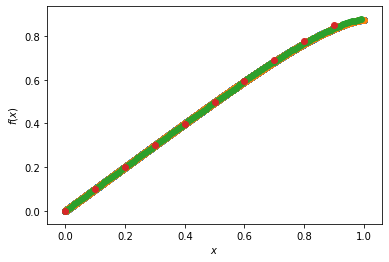

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

def dfdx(x):
    return np.sqrt(1 - x**4)

def integrate(dfdx, xbegin, xend, fbegin, dx):
    x = xbegin
    f = fbegin

    fvalues = []
    xvalues = []
    while x < xend - dx/2.:  # why did I do this? Ask me about numerical (im)precision...!
        xvalues.append(x)
        fvalues.append(f)

        fnew = f + dfdx(x) * dx
        f = fnew
        x = x + dx

    return (x, f), (fvalues, xvalues)

ftrue = 0.8740191847640399368216131966303731378942516504772077209389405679
print("f_true = {:0.10f}".format(ftrue))

for dx in reversed([0.1, 0.01, 0.001, 0.0001]):
    duration = perf_counter()
    (xend, fend), (fvalues, xvalues) = integrate(dfdx, 0, 1, 0, dx)
    duration = perf_counter() - duration

    # Plotting
    plt.scatter(xvalues, fvalues)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    print(f"For dx={dx:.4f}: f({xend:f}) = {fend:.10f} (difference: {fend-ftrue:.6f}) (time: {duration*1000:.6f} milliseconds)")

Two key things to learn from the code above:
1. The lower the step size $dx$, the higher the accuracy (~740x improvement!), but also...
1. ... the compute time grows by roughly the same factor (~900x).

I.e., there's (generally) no such thing as a free lunch (we'll get to more of that later)!

Exercise: Euler's method corresponds to the "left rule" in Riemann integration (they're basically the same thing, just viewed slightly differently -- this is very common in physics, there's more than one way to interpret the same math!). Can you improve on this algorithm by changing it to use the midpoint method?

For more discussion of integration techniques, see [this page]( https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations#Methods) on Wikipedia. Thousands of people have contributed to this field, over many decades -- developing a better/faster method is a great way to become instantly famous (at least in numerical math circles...)!

## Numerically solving 2nd order differential equations

A skeptical person would (rightfully) complain that what we've shown above is nothing more than Reimann integration viewed from a different perspective. E.g., even our function in the code is named `integrate`! So why have we done this...?

It's because the same concepts allow us to solve more complicated, second (and higher) order differential equations.

Let's take our harmonic oscillator, and pretend for a bit we don't know how to solve it analytically. As a reminder, the harmonic oscillator ODE is:

$$ m \ddot x = -k x $$

Say we know the initial conditions -- $x(t=0)$ and $\dot x(t=0)$. How do we go about solving the trajectory $x(t)$ of this object?

We first start by rewriting this *second order* differential equation as two *first order* differential equations:

$$ \dot v = -\frac{k}{m} x $$
$$ \dot x = v $$

This is not very clever (yet) -- we've just given a name to $\dot x$ and called it $v$, and rearranged the equations so that the derivatives are on the left hand side. Here $x$ and $v$ are just our position and velocity. Note that they're functions of time (we should more correctly write them as $x(t)$ and $v(t)$, but physicists tend to be lazy).

But now for the clever part: each of these equations is a first-order D.E., and we can use the same finite differencing approximation as we did before:

$$ v(t+\Delta t) \approx v(t) + v'(t) \cdot \Delta t $$
$$ x(t+\Delta t) \approx x(t) + x'(t) \cdot \Delta t $$

and using the D.E.s above:

$$ v(t+\Delta t) \approx v(t) -\frac{k}{m} x(t) \cdot \Delta t $$
$$ x(t+\Delta t) \approx x(t) + v \cdot \Delta t $$

Ta da! If we know where the body's position and velocity at time $t$, we now have a prescription for how to (approximately) compute its position and velocity in the next instant of time $t+\Delta t$!

Let's implement this in Python:

Text(0, 0.5, '$x(t)$ (meters)')

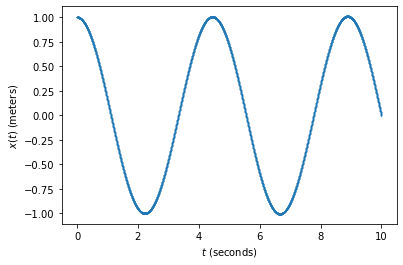

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

k = 2
m = 1

def dxdt(x, v, t):
    return v

def dvdt(x, v, t):
    return - k / m * x

def integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt):
    # set up initial conditions
    t = tbegin
    x = x0
    v = v0

    xvalues = []
    vvalues = []
    tvalues = []
    while t < tend - dt/2.:  # why did I do this? Ask me about numerical (im)precision...!
        tvalues.append(t)
        xvalues.append(x)
        vvalues.append(v)

        xnew = x + dxdt(x, v, t) * dt
        vnew = v + dvdt(x, v, t) * dt
        
        x = xnew
        v = vnew
        t = t + dt

    return (t, x, v), (tvalues, xvalues, vvalues)

(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, 0, 10, 1, 0, 0.001)

# Plotting
plt.scatter(tvalues, xvalues, s=0.1)
plt.xlabel("$t$ (seconds)")
plt.ylabel("$x(t)$ (meters)")

That looks about right!! Just to make sure, let's overplot the analytic solution:

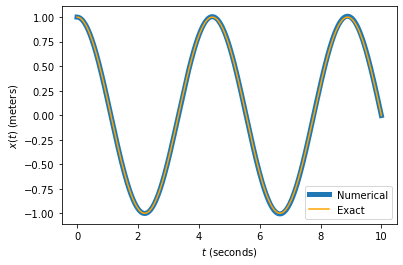

In [78]:
tbegin, tend = 0, 10
x0, v0 = 1, 0
dt = 0.001

# numerical solution
(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt)

# exact solution
phi = np.arctan(-v0/x0 * np.sqrt(m/k))
A   = np.sqrt(x0**2 + v0**2 * m / k)
t   = np.asarray(tvalues)
x   = A * np.cos(np.sqrt(k/m)*t + phi)

# plot the two!
plt.plot(tvalues, xvalues, linewidth=5, label="Numerical")
plt.plot(t, x, color='orange', label="Exact")
plt.xlabel("$t$ (seconds)")
plt.ylabel("$x(t)$ (meters)")
plt.legend();

In the plot above, the numerical solution is plotted using a thick, blue, line. Overplotted on top of it is the exact solution, as a thin orange line. They fall right on top of each other! Fantastic!

Exercise: now play with the values for initial conditions, the spring constant, or the mass, and confirm that the numerical and exact solutions continue to agree.

### This is general!

Take a look at the `integrate` function we wrote above. I'll copy it here to make it easier:

In [2]:
def integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt):
    # set up initial conditions
    t = tbegin
    x = x0
    v = v0

    xvalues = []
    vvalues = []
    tvalues = []
    while t < tend - dt/2.:  # why did I do this? Ask me about numerical (im)precision...!
        tvalues.append(t)
        xvalues.append(x)
        vvalues.append(v)

        xnew = x + dxdt(x, v, t) * dt
        vnew = v + dvdt(x, v, t) * dt
        
        x = xnew
        v = vnew
        t = t + dt

    return (t, x, v), (tvalues, xvalues, vvalues)

Note how it never directly mentions (or requires to know) that the DE we've been solving was the harmonic oscillator. All it needed was to be given are the `dxdt` function (a Python function that returns the velocity) and the `dvdt` function (a Python function that returns the acceleration).

The fact we're solving the harmonic oscillator is *fully encapsulated* in these other two functions, and not in the `integrate` function:

In [80]:
k = 2
m = 1

def dxdt(x, v, t):
    return v

def dvdt(x, v, t):
    return - k / m * x

This is not an accident:
* The *physics* of the problem is fully encapsulated in the differential equations -- a.k.a ***differential equations of motion*** -- and that is what these two functions implement.
* The *mathematics* of how we numerically solve the differential equations does not depend on exactly what's in those equation, and can therefore be separated into its own function -- namely `integrate`.

A metaphore: think about cooking. To cook a dish you need the ingredients, recipe, and also some kind of a stove. What dish you're making generally won't depend on whether the stove is gas or electric. Vice versa, the stove generally doesn't care what is it you're cooking. Our dish are the differential equations; our stove is the integration method (sometime known as *the "integrator"*).

This decoupling can be used to great advantage:
* We can use a different DE solving technique on the same physical problem by simply implementing a different `integrate` function (or using one that someone has implemented for us)
* We can implement and solve different physical situations by simply providing different `dxdt` and `dvdt` functions, whereas `integrate`, the plotting routines, everything else stays the same!

Let's do the latter -- we'll modify `dxdt` and `dvdt` to now implement the [Damped Harmonic Oscillator](https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Complex_Methods_for_the_Sciences_(Chong)/05%3A_Complex_Oscillations/5.01%3A_The_Damped_Harmonic_Oscillator):

In [83]:
k = 2
m = 1
gamma = 0.2

def dxdt(x, v, t):
    return v

def dvdt(x, v, t):
    return -2*m*gamma*v - k / m * x

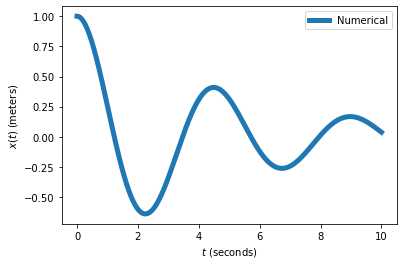

In [84]:
tbegin, tend = 0, 10
x0, v0 = 1, 0
dt = 0.001

(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt)

plt.plot(tvalues, xvalues, linewidth=5, label="Numerical")
plt.xlabel("$t$ (seconds)")
plt.ylabel("$x(t)$ (meters)")
plt.legend();

And there it is! Compare it to a plot [here](http://hyperphysics.phy-astr.gsu.edu/hbase/oscda.html) (for example). And see [this YouTube video](https://www.youtube.com/watch?v=HRcjtVa1LfM) to develop more intiution on what the above plot represents.

What if we get even more ambitious? How about if we compute the trajectory of a body that's left to drop onto the Sun from the distance of the Earth? In other words, if the Earth suddenly stopped revolving around the Sun, how would it fall onto it?

Numerically found freefall time: 64.641 days
Exact freefall time            : 64.568 days


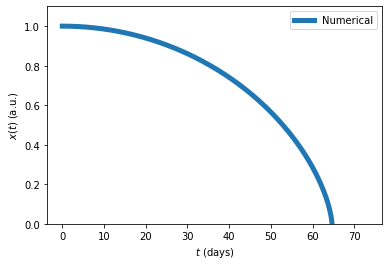

In [37]:
G = 6.674e-11  # gravitational constant G
M = 1.9891e+30 # mass of the sun

def dxdt(x, v, t):
    return v

def dvdt(x, v, t):
    return - G * M / x**2

year = 60*60*24*365    # one year worth of seconds
au = 149_600_000_000   # astronomical unit in meters
tbegin, tend = 0, 0.2*year
x0, v0 = 1*au, 0
dt = 0.0001*year

(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt)

tvalues = np.asarray(tvalues) / year * 365
xvalues = np.asarray(xvalues) / au

plt.plot(tvalues, xvalues, linewidth=5, label="Numerical")
plt.xlabel("$t$ (days)")
plt.ylabel("$x(t)$ (a.u.)")
plt.legend();
plt.ylim(0, 1.1)

# let's find the moment where x turned negative: that's the time it took
# the object to fall
t_freefall = max(tvalues[xvalues > 0])
print(f"Numerically found freefall time: {t_freefall:.5} days")
print(f"Exact freefall time            : {365.25/np.sqrt(32):.5} days")

The plot above shows us how such body would start falling slowly towards the Sun, falling only ~20% of the way there in the first ~30 days, but as it picks up speed the fall would be faster and faster until it hits the Sun in day 64. So we'd have at least a few days until things got uncomfortably hot -- not sure if that's good or bad...

Compare these results to the derivation of the freefall time [here](https://en.wikipedia.org/wiki/Free-fall_time#Infall_to_a_point_source_of_gravity) and freefall trajectory [here](https://en.wikipedia.org/wiki/Free_fall#Inverse-square_law_gravitational_field) -- see how much more complex these are? Not bad for ~2 minutes worth of work (and it gets us closer to our goal of computing arbitrary orbits)!

Exercise: modify $v_0$ above and see what would happen if we launched the Earth away from the Sun with (say) $10$km/s.

## No Free Lunch: Understand Your Approximations

Let's go back to the harmonic oscillator, but this time instead of using $dt = 0.001$, let's use a larger timestep -- say, $dt = 0.01$:

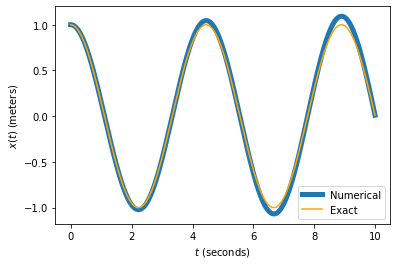

In [39]:
k = 2
m = 1

def dxdt(x, v, t):
    return v

def dvdt(x, v, t):
    return - k / m * x

tbegin, tend = 0, 10
x0, v0 = 1, 0
dt = 0.01

# numerical solution
(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt)

# exact solution
phi = np.arctan(-v0/x0 * np.sqrt(m/k))
A   = np.sqrt(x0**2 + v0**2 * m / k)
t   = np.asarray(tvalues)
x   = A * np.cos(np.sqrt(k/m)*t + phi)

# plot the two!
plt.plot(tvalues, xvalues, linewidth=5, label="Numerical")
plt.plot(t, x, color='orange', label="Exact")
plt.xlabel("$t$ (seconds)")
plt.ylabel("$x(t)$ (meters)")
plt.legend();

See how our numerical solution has now started to deviate from the exact solution? Try changing it further -- see what happens when you use $dt = 0.1$.

What's going on here is that we _are_ dealing with approximations. Remember that our technique is based on approximating *derivatives* -- differences in the value of the function taken over infinitesimally small intervals -- with *finite differences* -- differences taken over finite intervals. The worse that approximation is, the more error we're going to get in the solutions. And that is what we see above.

How that error manifests itself depends on the physical problem. In the case of a spring, the approximation always slightly overestimates the velocity; that is why the numerical solution grows larger and larger than the exact one. In the case of freefall onto the Sun, the velocity will tend to be underestimated, so the Earth will appear to take longer to fall onto the Sun the larger the timestep (try it -- go back and change the timestep!).

Understanding how accurate is your numerical solution can be incredibly challenging. Though there are some rules of thumb, there are no general prescriptive ways to do it. A good practical way is to test your integration technique by numerically solving a system for which an analytic solution exists, and compare the two. This is why we've used the harmonic oscillator, and the freefall time for the Earth; with these two, we can find the largest $dt$ which still gives us acceptable precision, and then using that $dt$ move on to solve /similar/ problems for which analytic solution does not exist.

The other thing to keep in mind is that the longer you integrate, the more error will the solution accumulate. Let's integrate the harmonic oscillator with $dt=0.02$ timestep:

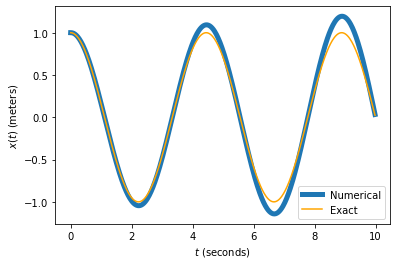

In [41]:
tbegin, tend = 0, 10
x0, v0 = 1, 0
dt = 0.02

# numerical solution
(t, x, v), (tvalues, xvalues, vvalues) = integrate(dxdt, dvdt, tbegin, tend, x0, v0, dt)

# exact solution
phi = np.arctan(-v0/x0 * np.sqrt(m/k))
A   = np.sqrt(x0**2 + v0**2 * m / k)
t   = np.asarray(tvalues)
x   = A * np.cos(np.sqrt(k/m)*t + phi)

# plot the two!
plt.plot(tvalues, xvalues, linewidth=5, label="Numerical")
plt.plot(t, x, color='orange', label="Exact")
plt.xlabel("$t$ (seconds)")
plt.ylabel("$x(t)$ (meters)")
plt.legend();

Note how around ~2 secods the solution still seems ~OK, but as more and more time passess, it becomes worse and worse. This is why the *timespan* over which you need to know the solution is an important factor to consider. Knowing precisely where a comet will be in the next 10 years is very different than precisely knowing where it will be 10 million years later!

Because of these issues, when it comes to ODE solving, we're always interested in:
1. An exact solution, if there is one! And if not...
1. A numerical solution, that's as accurate as possible given the computing we can afford.

The accuracy is not just affected by the choice of timestep, but also by the choice of integration technique (remember left-rule, mid-point, etc.). This is why many, Many, MANY clever techniques were developed over the years, all trying to increase accuracy while keeping the computational cost low. If you want to learn about some of them, a good way to start is by looking into the widely used [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) family of methods.

## Summary

In this section, we've learned how to numerically solve ordinary differential equations. This is an incredibly powerful technique that will allows us to *simulate* physical systems (i.e., parts of the world around us). It is the basis of virtually everything we work with and use today -- from building machines in mechanical engineering to weather forcasting, climate, and computing trajectories of rockets as they move through space.

Some exercises that will get you further acquainted with numerical integration:

Problem #1: numerically compute the motion of a pendulum. Start [here](https://en.wikipedia.org/wiki/Pendulum_(mechanics)) to learn how to find the differential equation of motion for the angle $\theta$ of the pendulum w.r.t. the vertical line, and then solve it numerically by copy-pasting and modifying the functions from examples above. To know if you got it right, note that [for small angles](https://en.wikipedia.org/wiki/Pendulum_(mechanics)#Small-angle_approximation) $\theta$ the pendulum's equation of motion is the same as that of the harmonic oscillator -- so you know the exact solution! Compare that exact solution to your numerical one (e.g. make some nice plots).